
** reproduce the result in **
http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


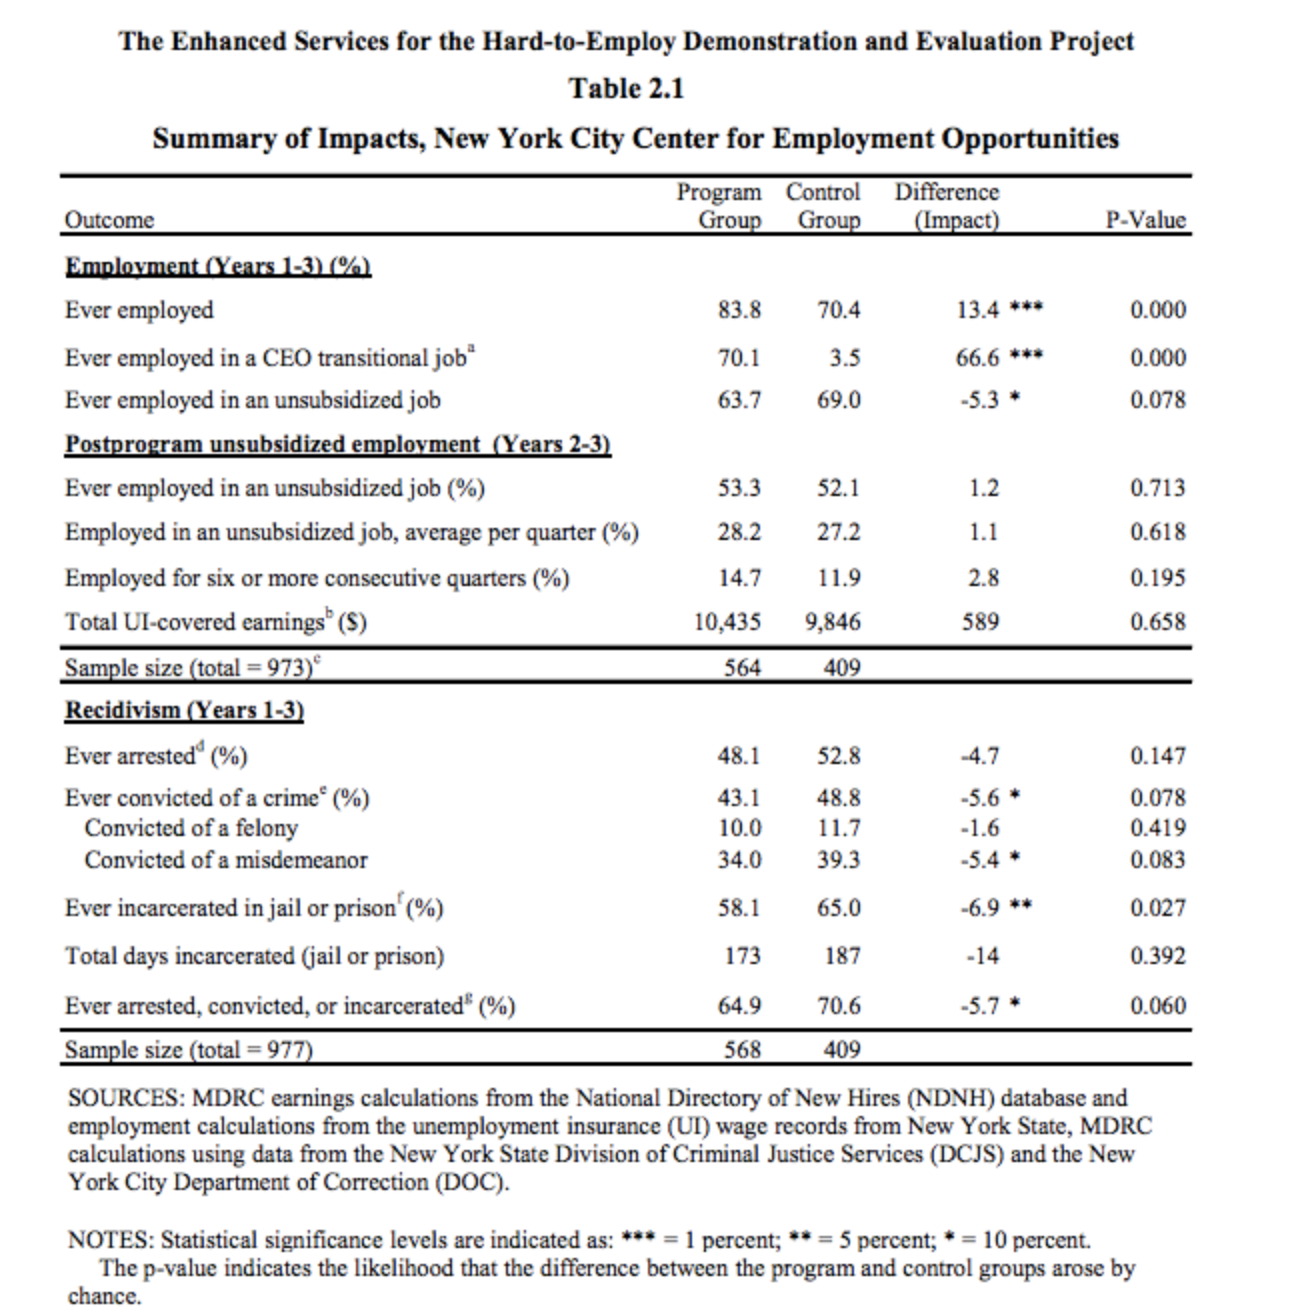

In [9]:
import os
import sys
import numpy as np
import pylab as pl


import json
import os
os.getenv("PUI2017")

%pylab inline

from IPython.display import Image
Image(filename='plot4class.png')



In [2]:

alpha=0.05
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

n_0 = 409
n_1 = 564

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


we must assess the statistical significance


 samples, categorical data
 
 ** TWO OPTIONS z test, or chi-square test.  **

# START WITH Z TEST

** the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality_ **


In [3]:
Image("ztest.png")
#https://onlinecourses.science.psu.edu/stat414/node/268

must define the sample standard deviation (standard error)

In [4]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.421047276465


** standard deviation of the sampling distribution the distribution is Binomial, the binomial stdev is **

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n0} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

** $\hat{p} =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$ **


Note that in the online version of Statistics in a Nutshell, $\bar{x}$  should be  $\hat{p}$!!

In [5]:
# I am goonna create a little one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

** z score: how many standard deviation away from the population parameter is my statistic? **

 $z=\frac{P_1-P_0}{\sigma}$

In [6]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)


20.7697865408


note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for $P[Z<z]$ if z is positive, and $P[Z>z]$ if z is negative.

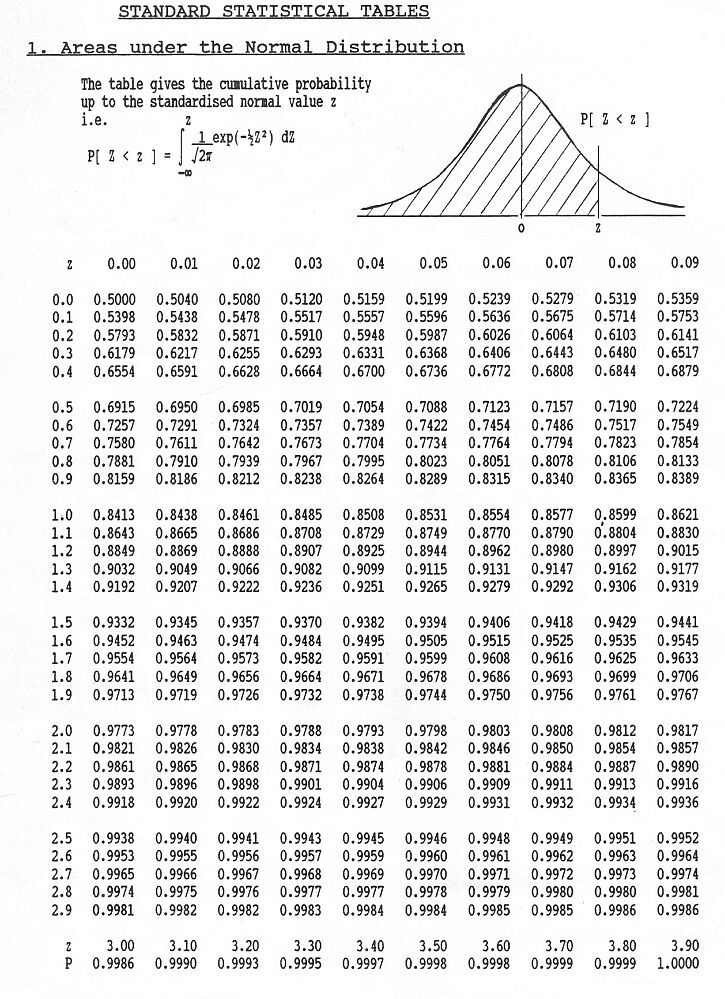

In [7]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

* if $p<\alpha$ : reject H0 **

IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but 

p-value = 1-P

In [16]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9984


def report_result(p_2y,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p_2y,a))
    if p_2y < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p_2y < a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


# what if we used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?

Null: the % of former prisoners convicted of a felony after release is the same or higher for candidates who participated in the program as for the control group, significance level p=0.05

Alternative: The % of former prisoners convicted of a felony after release is less for candidates who participated in the program as for the control group

** $H_0: P_1- P_0 \geq$    0 **
    
** $H_a: P_1- P_0 $< 0    **
    
    
** $\alpha$ = 0.05    **

** $P_0=0.117, P_1=0.100$**

 look up data table and insert the appropriate values to get the appropriate result! you can use the functions I defined above, with different arguments. 

In [11]:
alpha=0.05
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 11.7 * 0.01 
P_1 = 10.0 * 0.01

if P_1 - P_0 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

n_0 = 409
n_1 = 564

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

we must assess the statistical significance


In [12]:
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print sp

0.107145940391


In [13]:
# I am goonna create a little one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

In [14]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_3y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_3y)

-0.846282982605


In [15]:
#using negative table http://www.z-table.com/

p_3y = 1 - 0.198776

def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_3y, alpha)

is the p value 0.80 smaller than the critical value 0.05?
NO!
the Null hypothesis is not rejected


# Now lets do it with the $\chi^2$ test

this analysis can also be done with the $\chi^2$ test, and the  $\chi^2$ distribution, 

see  flowcharts for how to choose a test and "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

 Where _i_ indicates the sum over _each cell_.
 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

 The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|employed in subsadized job |     employed          | not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

 for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

** FOR EACH CELL: **
**  expected_cell = $\frac{row~tot * col~tot}{total}$ **


In [2]:
from evalChisq import evalChisq

ImportError: No module named evalChisq

In [12]:

Ntot = 973 # a + b + c + d = tot

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

print (evalChisq(sample_values))

NameError: name 'evalChisq' is not defined

This number must be compared to the chi sq distribution. 
You must calculate the number of degrees of freedom forthis experiment. 
Generally: DOF = Number of observations - number of Independent Variables

so here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null

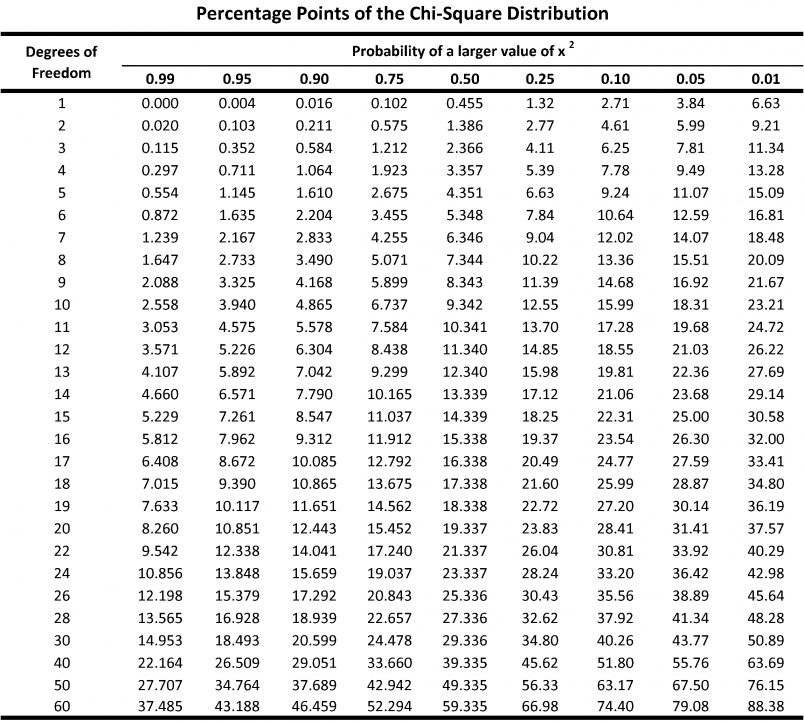

In [17]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please  state what that means in terms of your Null hypothesis in a markdown cell below!

# !!!!!! TODO FOR YOU!
lets see what the chi sq statistics says about the conviction for fellonies (row 10)

* fill in the contingency table below *

|convicted of a felony     |     yes   | no        |                   
|---------------------------|-----------|-----------|----------------|
| test sample               |   .100 * 568  | .900* 568   |  568 |
|control sample            | .117 * 409  |    .883* 409 | 409  |
|                           |           |    |       |
| total                     |  104.653         |  872.347  |   977    |

continue...

In [35]:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

import numpy as np
import pandas as pd
import scipy.stats as stats

observed = 56.8

pop_ratios = 104.653/977  # Get population ratios

expected = pop_ratios * 568   # Get expected counts

print expected

numerator= observed-(expected**2)

#print sum(numerator/expected)

chi_squared_stat = sum(observed-expected)**2/expected

print(chi_squared_stat)

60.8422763562
0.268563228045


In [36]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
3.84145882069
P value
0.991752099458


In [38]:
print ("0.268 is hella smaller then 3.84. p value= 0.9917")
print ("for 1 dof at alpha=0.05 ")
print ("do not reject the null")

0.268 is hella smaller then 3.84. p value= 0.9917
for 1 dof at alpha=0.05 
do not reject the null


In [39]:
alpha= 0.05

def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_value, alpha)

is the p value 0.99 smaller than the critical value 0.05?
NO!
the Null hypothesis is not rejected
